# Week 6. Optimization. Programming Task

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house. 

**To submit your answers you will need to copy your token from next task ‘Programming: Final project’.**

**NOTE: you should write an optimal code: try avoiding cycles and use `numpy` instead! Optimality of your code will be graded out of 2 points**

Firstly, let us import basic libraries (`numpy` ([docs](https://numpy.org/)) for matrix operations and `pandas` ([docs](https://pandas.pydata.org/)) for convinient dataset workaround):

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd

### Task 1. Reading 

In [2]:
datX = np.load('x_train.npy')
datY = np.log(np.load('y_train.npy'))
datX = pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data (you can read more about the `load` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.load.html). But it is not a necessity). We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

Do not forget to install seaborn. You can do that by running `pip install seaborn` in the command line locally, or simply by running the next sell:

In [3]:
!pip install seaborn

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

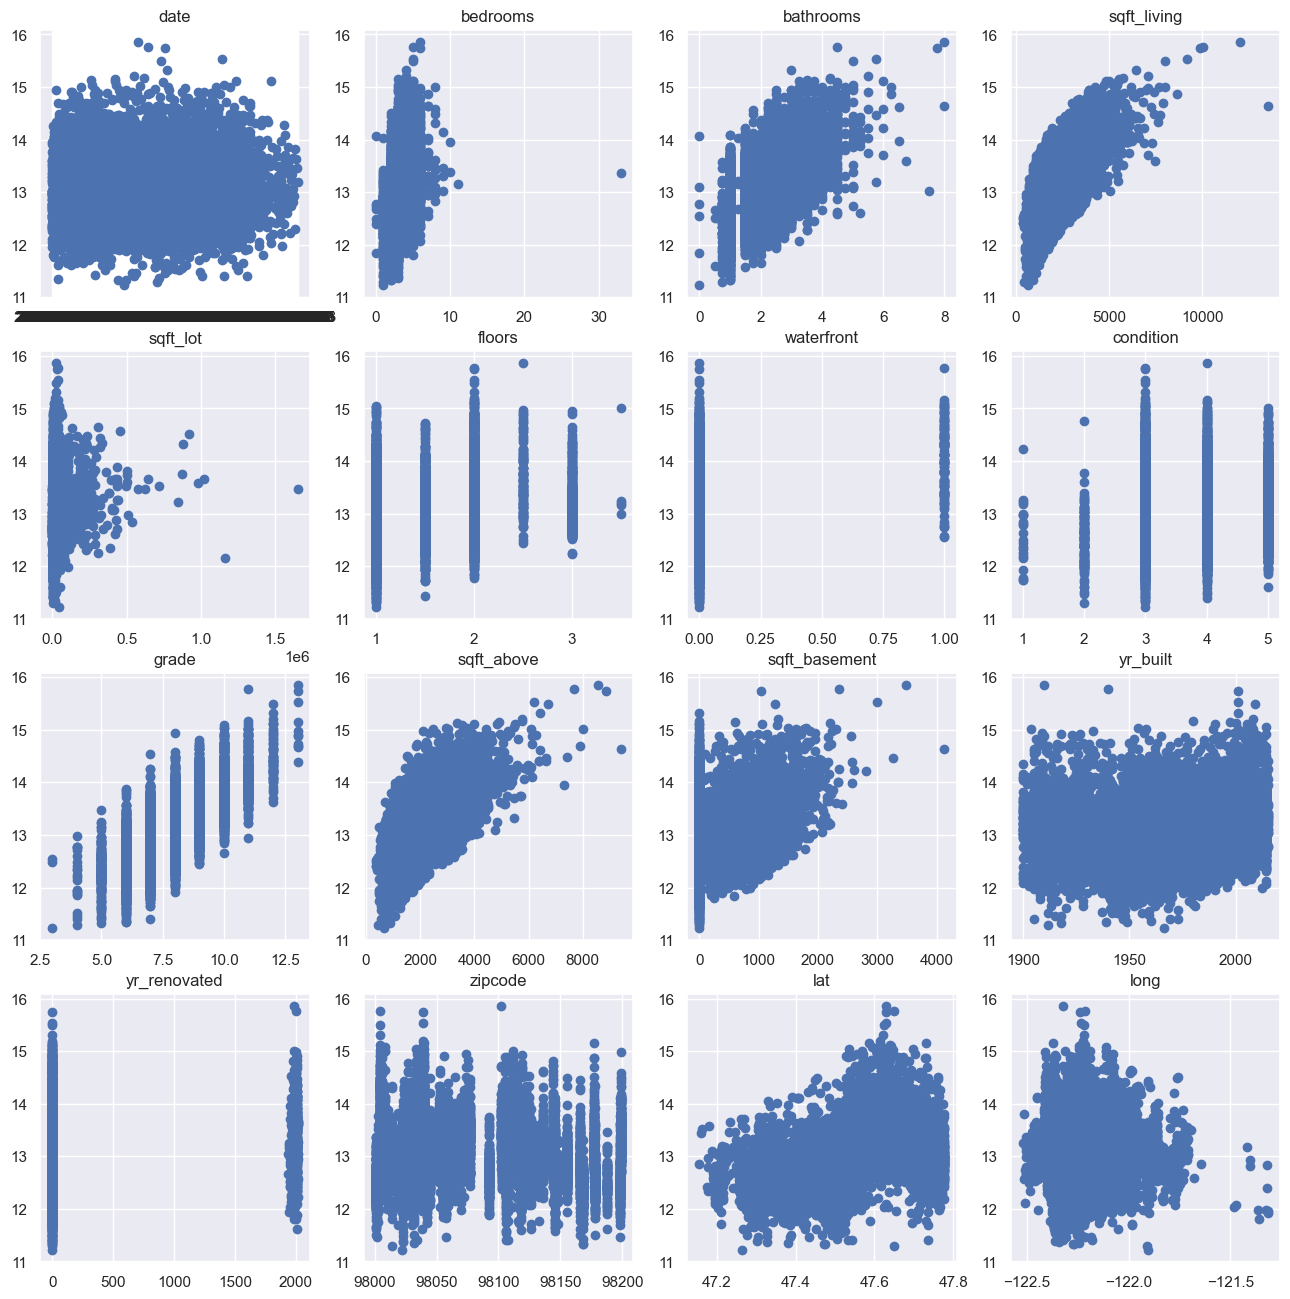

In [5]:
f, ax = plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of new features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [6]:
#your code goes here
X = datX[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'long', 'lat']].values
N = X.shape[0]
m = X.shape[1]
print('bedrooms ', 'bathrooms ', 'sqft_living', 'floors', 'condition ', 'grade ', 'sqft_above', 'sqft_basement', 'long      ', 'lat')
with np.printoptions(precision=4, suppress=True, edgeitems=5, linewidth=130):
    print(X)
print(f'N = {N:,} houses')
print(f'm = {m} features')
print('Table 1: House features matrix')

bedrooms  bathrooms  sqft_living floors condition  grade  sqft_above sqft_basement long       lat
[[   5.        3.25   3710.        2.        3.        8.     2510.     1200.     -122.047    47.6101]
 [   3.        1.75   2820.        1.        5.        7.     1540.     1280.     -122.376    47.5094]
 [   3.        1.     1240.        1.        3.        6.     1240.        0.     -122.046    47.4303]
 [   4.        2.5    2670.        2.        3.        7.     2670.        0.     -122.328    47.4292]
 [   3.        2.25   2700.        2.        4.        8.     1760.      940.     -122.294    47.6074]
 ...
 [   4.        2.75   2290.        2.        4.        7.     2170.      120.     -122.327    47.6746]
 [   3.        2.     1430.        1.        4.        8.      990.      440.     -122.096    47.6952]
 [   2.        1.      640.        1.        3.        6.      640.        0.     -122.359    47.515 ]
 [   3.        1.     1630.        1.        5.        7.     1630.      

Run the following cells to automatically check results of your code:

Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [7]:
def add_x0(X):
    # Prepend X with a column of all ones
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

In [8]:
X_orig = add_x0(X)

In [9]:
def loss(w, X, y):
    #your code goes here
    # Row-wise dot product
    y_hat = np.sum(w * X, axis=1)
    # Sum / N = mean
    lossValue = np.mean((y - y_hat) ** 2)
    return (lossValue, y_hat)

In [10]:
# Test the loss function with small random weights
w_rand = np.random.randint(low=-10, high=11, size=11, dtype=int) / 10
w_const = [-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
w_init = w_const
loss_val, y_pred = loss(w=w_init, X=X_orig, y=datY)
with np.printoptions(precision=3, suppress=True, edgeitems=5, linewidth=130):
    print(f'Weights: {w_init}')
    print(f'Real y: {datY}')
    print(f'Predicted y: {y_pred}')
print(f'MSE: {loss_val:.2f}')    

Weights: [-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
Real y: [13.361 13.032 12.363 12.936 13.222 ... 13.819 13.142 12.014 12.899 12.946]
Predicted y: [-2978.025 -1817.153 -1455.854 -3171.04  -2080.025 ... -2572.139 -1155.84   -736.562 -1924.975  -833.5  ]
MSE: 5559196.25


Run the following cells to automatically check results of your code.

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

$$Loss(\vec{w}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i=1}^N (y_i - \vec{w} X_{i})^2.$$
$$\nabla Loss = \begin{pmatrix} \frac{\partial Loss}{\partial w_{0}} \\
\frac{\partial Loss}{\partial w_{1}} \\ \cdots \\ \frac{\partial Loss}{\partial w_{m}} \end{pmatrix} = \frac{\partial Loss(\vec{w})}{\partial \vec{w}} = \frac{1}{N} \sum_{i=1}^N \frac{\partial (y_i - \vec{w} X_{i})^2}{\partial \vec{w}} = -\frac{2}{N} \sum_{i=1}^N X_{i}(y_i - \vec{w} X_{i}).$$
$\nabla Loss$ is a vector of size of $\vec w$, i.e. $m + 1$, where $m$ is the number of features.

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`. 

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations. **Your score will be decreased if you use cycles**!


In [11]:
def grad(w_k, X, y):
    #your code goes here
    # Row-wise dot product
    y_hat = np.sum(w_k * X, axis=1)
    # X should be transposed first before matrix by vector multiplication -- dot product
    # Sum / N = mean
    lossGradient = -2 * np.mean(X.T * (y - y_hat), axis=1)
    return lossGradient

In [12]:
# Test the grad function with small random weights
grad_vec = grad(w_k=w_init, X=X_orig, y=datY)
print('grad(Loss(w_k)) = ', end='')
with np.printoptions(precision=3, suppress=True, edgeitems=6, linewidth=130):
    print(grad_vec)

grad(Loss(w_k)) = [    -4268.109    -15295.802    -10132.233 -10538053.788     -6958.183    -14340.868    -34483.603  -9336025.842  -1202027.946
    521520.694   -202992.908]


Run the following cells to automatically check your function. 

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`. 

In [13]:
def gradDescent(w_init, alpha, X, y, maxiter=1000, eps=1e-2):
    
    losses = []
    weights = [deepcopy(w_init)]
    curiter = 0
    w_k = deepcopy(weights[-1])
    
    #your code goes here
    while (curiter < maxiter) and (np.linalg.norm(grad(w_k, X, y)) > eps):
        w_k = w_k - alpha * grad(w_k, X, y)
        lossValue_k = loss(w_k, X, y)[0]
        weights.append(w_k)
        losses.append(lossValue_k)        
        curiter += 1
        
    return (weights, losses)

In [14]:
# Test the gradDescent function with small random weights and different alphas
weights_110, losses_110 = gradDescent(w_init=w_init, alpha=1e-10, X=X_orig, y=datY)
weights_19, losses_19 = gradDescent(w_init=w_init, alpha=1e-9, X=X_orig, y=datY)
weights_17, losses_17 = gradDescent(w_init=w_init, alpha=1e-7, X=X_orig, y=datY)

Experiment with several alphas and several initial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weights from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

###### <a id="fig1">.</a>

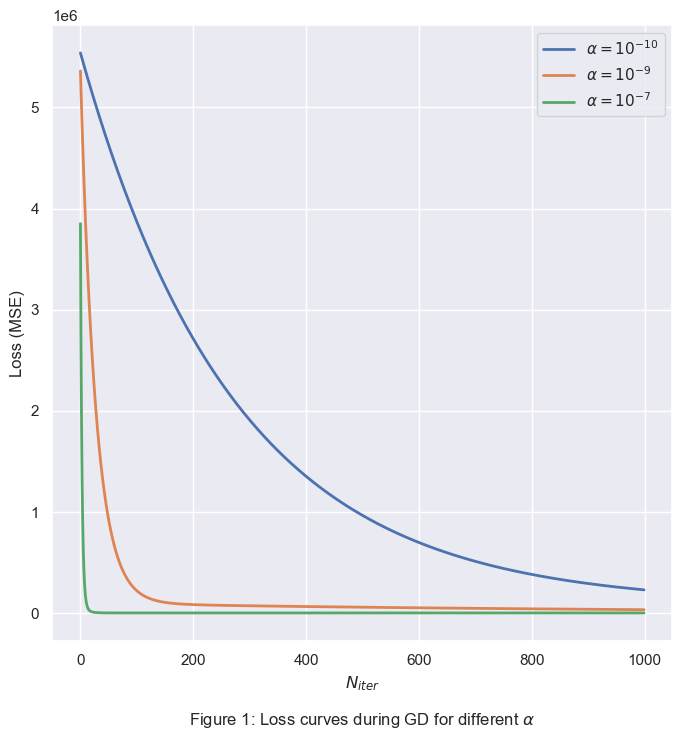

In [15]:
# Loss curves for different alpha
plt.figure(figsize=(8,8))

#your code goes here
plt.plot(losses_110, linewidth=2, label=r'$\alpha = 10^{-10}$')
plt.plot(losses_19, linewidth=2, label=r'$\alpha = 10^{-9}$')
plt.plot(losses_17, linewidth=2, label=r'$\alpha = 10^{-7}$')
plt.title(r'Figure 1: Loss curves during GD for different $\alpha$', y=-0.15)
plt.xlabel('$N_{iter}$')
plt.ylabel('Loss (MSE)')
#plt.yscale('log')
plt.legend();

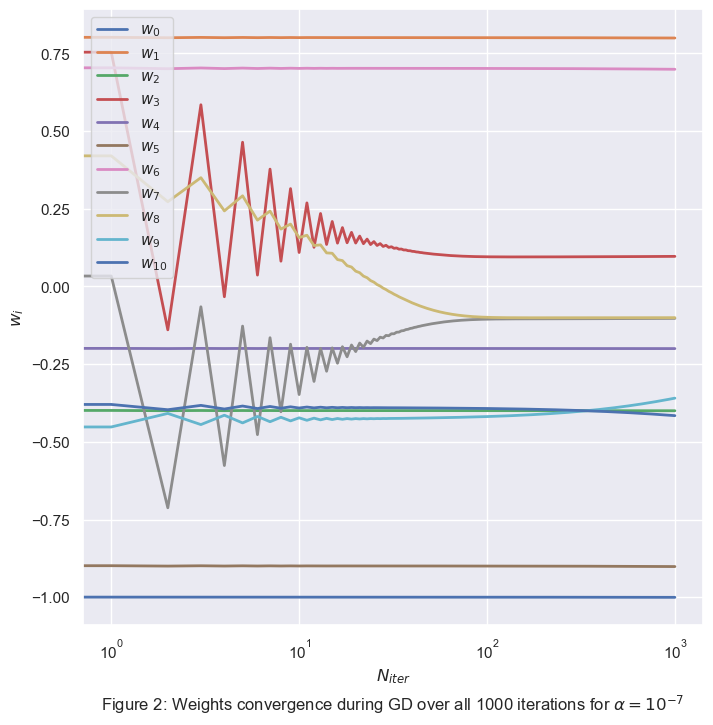

In [16]:
# Weights convergence over iterations (time)
plt.figure(figsize=(8,8))
plt.plot(weights_17, linewidth=2, label=[f'$w_{ {i} }$' for i in range(11)])
plt.title(f'Figure 2: Weights convergence during GD over all {len(weights_17)-1} iterations for $\\alpha = 10^{{-7}}$', y=-0.15)
plt.xlabel('$N_{iter}$')
plt.ylabel('$w_{i}$')
plt.xscale('log')
plt.legend();

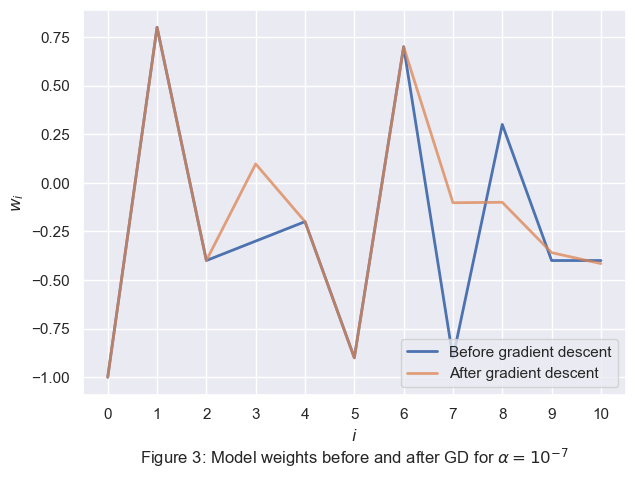

In [17]:
# Weights before and after gradient descent
plt.figure(figsize=(7,5))
plt.plot(w_init, linewidth=2, label='Before gradient descent')
plt.plot(weights_17[-1], linewidth=2, alpha=0.75, label='After gradient descent')
plt.xticks(range(11))
plt.title(r'Figure 3: Model weights before and after GD for $\alpha = 10^{-7}$', y=-0.2)
plt.xlabel('$i$')
plt.ylabel('$w_{i}$')
plt.legend();

In [18]:
# Let's also find the best alpha to minimize the mean loss for the given number of iterations
alphas = [1e-10, 1e-9, 1e-7]
mean_losses = []
for alpha in alphas:
    weights, losses = gradDescent(w_init=w_init, alpha=alpha, X=X_orig, y=datY)
    mean_losses.append(np.mean(losses))

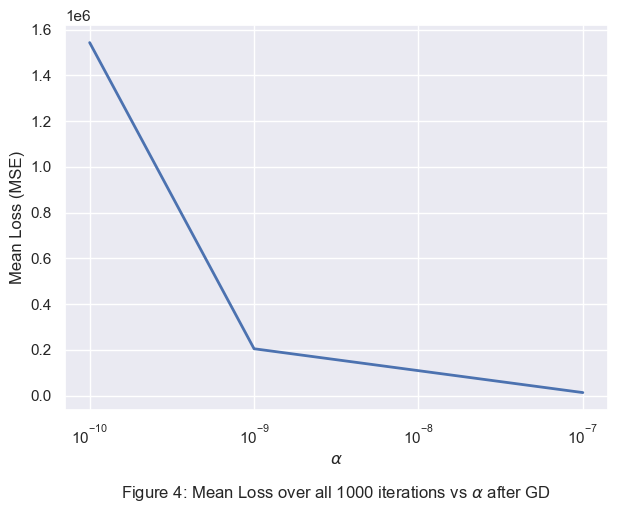

In [19]:
plt.figure(figsize=(7,5))
plt.plot(alphas, mean_losses, linewidth=2)
plt.title(f'Figure 4: Mean Loss over all {len(weights_17)-1} iterations vs $\\alpha$ after GD', y=-0.25)
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Loss (MSE)')
plt.xscale('log');

In [20]:
print('alpha', *alphas, sep='\t\t\t')
print('Mean Loss', *mean_losses, sep='\t')
print(f'Table 2: Mean Loss over all {len(weights_17)-1} iterations vs alpha after GD')

alpha			1e-10			1e-09			1e-07
Mean Loss	1543148.0055348321	204634.33097472208	12966.208643289896
Table 2: Mean Loss over all 1000 iterations vs alpha after GD


Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [21]:
### your code goes here
# Since we have shown above that the loss is minimal for alpha = 1e-7, let's use the weights for this alpha and those obtained in the last iteration
print(f'Weights before gradient descent:\n{w_init}')
print(f'Weights for alpha = 1e-7 after gradient descent:\n{weights_17[-1]}')
# Linear regression function
y_hat = lambda w, X: np.sum(w * X)
# Choose 5 random houses (indexes in X and y)
idxs = sorted(np.random.randint(low=0, high=X_orig.shape[0], size=10, dtype=int))
print('--------+', '--------------+', '--------------+', '-------------')
print('House #\t|', 'Real price\t|', 'y_hat w/o GD\t|', 'y_hat with GD')
print('--------+', '--------------+', '--------------+', '-------------')
for idx in idxs:
    y_pred_before_gd = y_hat(np.array(w_init), X_orig[idx])
    y_pred_after_gd = y_hat(np.array(weights_17[-1]), X_orig[idx])
    print(f'{idx:5}\t|{datY[idx]:9.4f}\t|{y_pred_before_gd:11.4f}\t|{y_pred_after_gd:9.4f}')
print('--------+', '--------------+', '--------------+', '-------------')
print('Table 3: Predictions before and after gradient descent without normalization, symmetric loss function')

Weights before gradient descent:
[-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
Weights for alpha = 1e-7 after gradient descent:
[-1.00033132  0.79936091 -0.39996721  0.09675956 -0.19995267 -0.90130004
  0.69875633 -0.10276049 -0.10047995 -0.35941668 -0.41576283]
--------+ --------------+ --------------+ -------------
House #	| Real price	| y_hat w/o GD	| y_hat with GD
--------+ --------------+ --------------+ -------------
  138	|  12.6761	| -1455.1659	|  18.2855
  630	|  12.7878	| -1454.7649	|  20.0702
 2710	|  12.8739	| -1456.5130	|  16.8316
 7587	|  12.7994	| -1359.4179	|  18.9371
 7728	|  13.3047	| -1742.3524	|  19.0344
 8874	|  13.0878	| -1695.6954	|  15.4398
 9068	|  12.6379	| -2390.3967	|  15.7583
 9211	|  12.9945	| -2714.5312	|  14.0063
12051	|  13.3315	| -2007.7970	|  16.2762
14816	|  13.1323	| -1575.1620	|  15.5686
--------+ --------------+ --------------+ -------------
Table 3: Predictions before and after gradient descent without normalization, symmetric los

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

We can see that predictions with randomly chosen initial weights:
* before optimization with gradient descent are not accurate at all,
* after optimization with gradient descent are much closer to the real values but still not very accurate.

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [22]:
def norm(X):
    # your code goes here
    # Return normalized feature matrix -- in fact, z-scores of all features
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [23]:
X_norm = add_x0(norm(X))

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

In [24]:
# your code goes here
# Test the gradDescent function with small random weights and different alphas for normalized data
weights_14_norm, losses_14_norm = gradDescent(w_init=w_init, alpha=1e-4, X=X_norm, y=datY)
weights_13_norm, losses_13_norm = gradDescent(w_init=w_init, alpha=1e-3, X=X_norm, y=datY)
weights_12_norm, losses_12_norm = gradDescent(w_init=w_init, alpha=1e-2, X=X_norm, y=datY)

###### <a id="fig5">.</a>

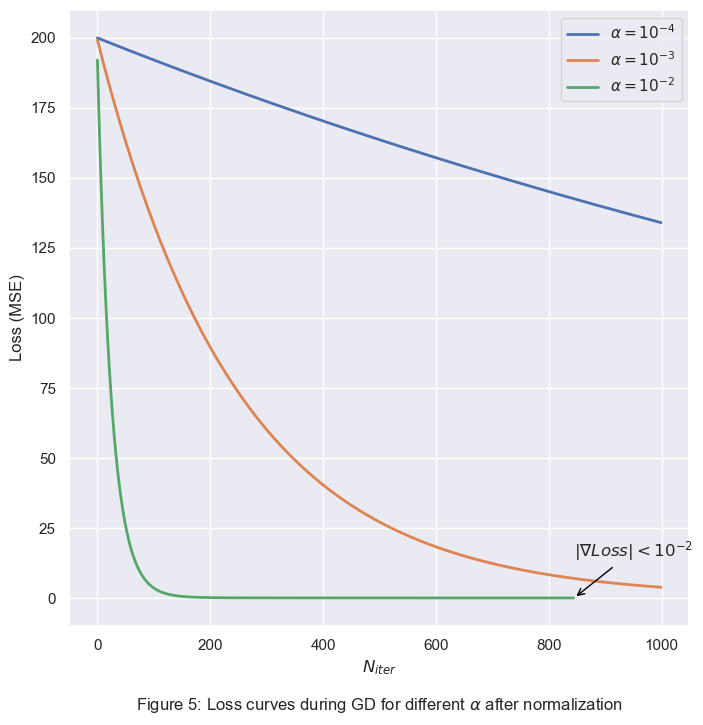

In [25]:
# Loss curves for different alpha for normalized data
plt.figure(figsize=(8,8))

#your code goes here
plt.plot(losses_14_norm, linewidth=2, label=r'$\alpha = 10^{-4}$')
plt.plot(losses_13_norm, linewidth=2, label=r'$\alpha = 10^{-3}$')
plt.plot(losses_12_norm, linewidth=2, label=r'$\alpha = 10^{-2}$')
plt.annotate(r'$|\nabla Loss| < 10^{-2}$', 
                xy=(len(losses_12_norm), losses_12_norm[-1]),
                xytext=(len(losses_12_norm), losses_12_norm[-1] + 15),
                arrowprops=dict(arrowstyle= '->',
                color='black',
                lw=1,
                ls='-')
           )
plt.title(r'Figure 5: Loss curves during GD for different $\alpha$ after normalization', y=-0.15)
plt.xlabel('$N_{iter}$')
plt.ylabel('Loss (MSE)')
#plt.yscale('log')
plt.legend();

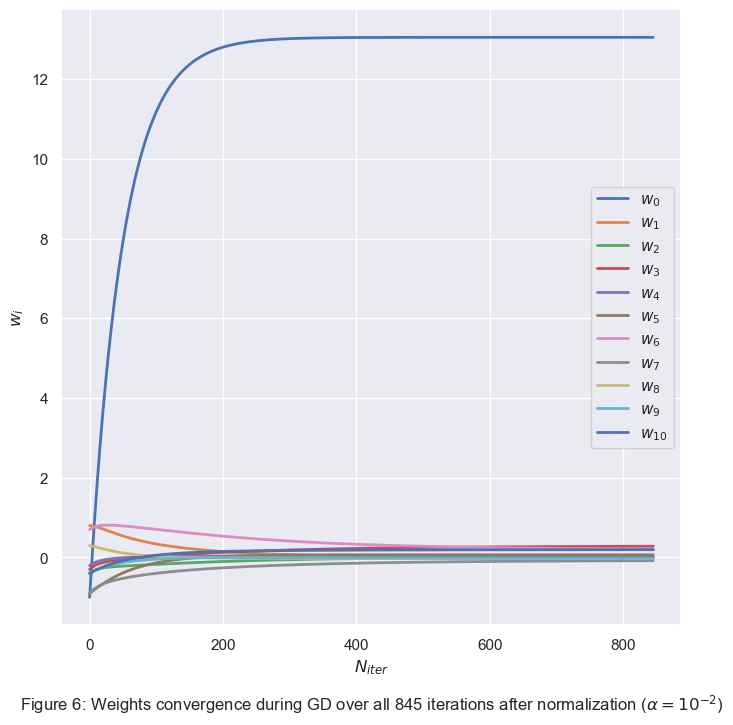

In [26]:
# Weights convergence over iterations (time)
plt.figure(figsize=(8,8))
plt.plot(weights_12_norm, linewidth=2, label=[f'$w_{ {i} }$' for i in range(11)])
plt.title(f'Figure 6: Weights convergence during GD over all {len(weights_12_norm)-1} iterations after normalization ($\\alpha = 10^{{-2}}$)', y=-0.15)
plt.xlabel('$N_{iter}$')
plt.ylabel('$w_{i}$')
#plt.xscale('log')
plt.legend();

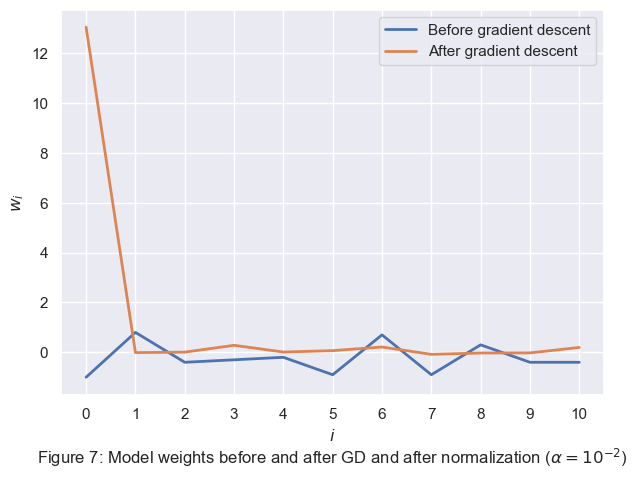

In [27]:
# Weights before and after gradient descent for normalized data
plt.figure(figsize=(7,5))
plt.plot(w_init, linewidth=2, label='Before gradient descent')
plt.plot(weights_12_norm[-1], linewidth=2, label='After gradient descent')
plt.xticks(range(11))
plt.title(r'Figure 7: Model weights before and after GD and after normalization ($\alpha = 10^{-2}$)', y=-0.2)
plt.xlabel('$i$')
plt.ylabel('$w_{i}$')
plt.legend();

###### <a id="fig8">.</a>

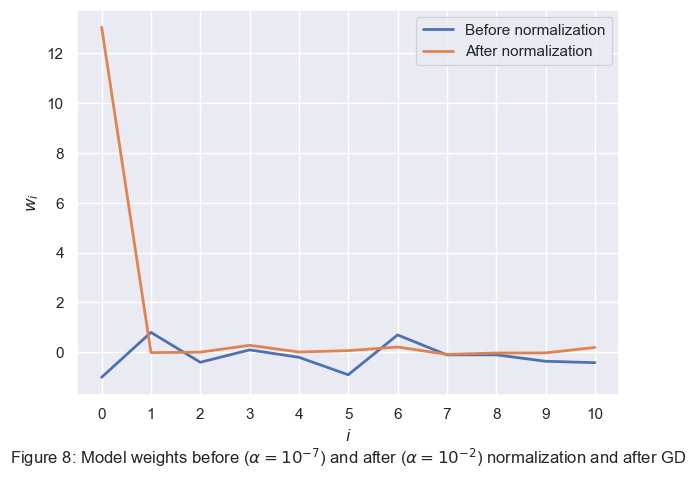

In [28]:
# Weights before and after normalization after gradient descent
plt.figure(figsize=(7,5))
plt.plot(weights_17[-1], linewidth=2, label='Before normalization')
plt.plot(weights_12_norm[-1], linewidth=2, label='After normalization')
plt.xticks(range(11))
plt.title(r'Figure 8: Model weights before ($\alpha = 10^{-7}$) and after ($\alpha = 10^{-2}$) normalization and after GD', y=-0.2)
plt.xlabel('$i$')
plt.ylabel('$w_{i}$')
plt.legend();

In [29]:
# Let's also find the best alpha to minimize the mean loss for the given number of iterations
alphas = [1e-4, 1e-3, 1e-2]
mean_losses_norm = []
for alpha in alphas:
    weights_norm, losses_norm = gradDescent(w_init=w_init, alpha=alpha, X=X_norm, y=datY)
    mean_losses_norm.append(np.mean(losses_norm))

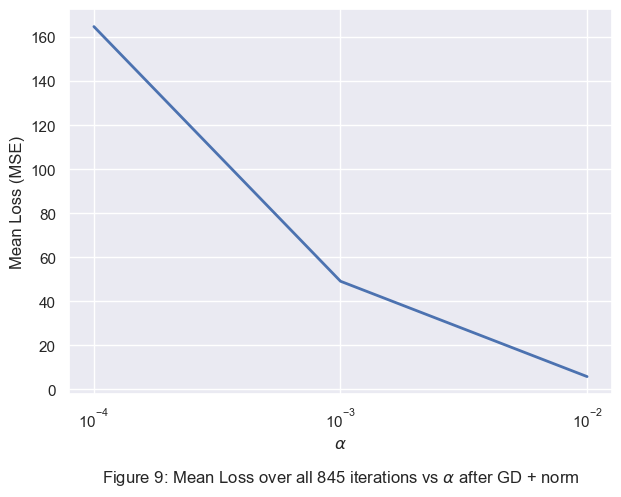

In [30]:
plt.figure(figsize=(7,5))
plt.plot(alphas, mean_losses_norm, linewidth=2)
plt.title(f'Figure 9: Mean Loss over all {len(weights_12_norm)-1} iterations vs $\\alpha$ after GD + norm', y=-0.25)
plt.xlabel(r'$\alpha$')
plt.ylabel('Mean Loss (MSE)')
plt.xscale('log');

In [31]:
print('alpha', *alphas, sep='\t\t\t')
print('Mean Loss', *mean_losses_norm, sep='\t')
print(f'Table 4: Mean Loss over all {len(weights_12_norm)-1} iterations vs alpha after GD with normalization')

alpha			0.0001			0.001			0.01
Mean Loss	164.739416118072	49.134903635802985	5.84925046779027
Table 4: Mean Loss over all 845 iterations vs alpha after GD with normalization


In [32]:
# Since we have shown above that the loss is minimal for alpha = 1e-2 for normalized data, let's use the weights for this alpha and those obtained in the last iteration
print(f'Weights before gradient descent:\n{w_init}')
print(f'Weights for alpha = 1e-7 after gradient descent:\n{weights_17[-1]}')
print(f'Weights for alpha = 1e-2 after gradient descent with normalization:\n{weights_12_norm[-1]}')
print('--------+', '--------------+', '--------------+', '--------------+', '--------------------')
print('House #\t|', 'Real price\t|', 'y_hat w/o GD\t|', 'y_hat with GD\t|', 'y_hat with GD + norm')
print('--------+', '--------------+', '--------------+', '--------------+', '--------------------')
for idx in idxs:
    y_pred_before_gd = y_hat(np.array(w_init), X_orig[idx])
    y_pred_after_gd = y_hat(np.array(weights_17[-1]), X_orig[idx])
    y_pred_after_gd_norm = y_hat(np.array(weights_12_norm[-1]), X_norm[idx])
    print(f'{idx:5}\t|{datY[idx]:9.4f}\t|{y_pred_before_gd:11.4f}\t|{y_pred_after_gd:9.4f}\t|{y_pred_after_gd_norm:9.4f}')
print('--------+', '--------------+', '--------------+', '--------------+', '--------------------')
print('Table 5: Predictions before and after gradient descent without and with normalization, symmetric loss function')

Weights before gradient descent:
[-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
Weights for alpha = 1e-7 after gradient descent:
[-1.00033132  0.79936091 -0.39996721  0.09675956 -0.19995267 -0.90130004
  0.69875633 -0.10276049 -0.10047995 -0.35941668 -0.41576283]
Weights for alpha = 1e-2 after gradient descent with normalization:
[ 1.30489545e+01 -1.19855053e-02  7.48361125e-03  2.81373324e-01
  1.17047636e-02  6.73995433e-02  2.12967919e-01 -8.10558579e-02
 -2.83246127e-02 -2.33231222e-02  1.95556675e-01]
--------+ --------------+ --------------+ --------------+ --------------------
House #	| Real price	| y_hat w/o GD	| y_hat with GD	| y_hat with GD + norm
--------+ --------------+ --------------+ --------------+ --------------------
  138	|  12.6761	| -1455.1659	|  18.2855	|  12.9662
  630	|  12.7878	| -1454.7649	|  20.0702	|  13.1273
 2710	|  12.8739	| -1456.5130	|  16.8316	|  12.6574
 7587	|  12.7994	| -1359.4179	|  18.9371	|  12.8977
 7728	|  13.3047	| -1742.3524	| 

### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money. 

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [33]:
def new_loss(w, X, y, a, b):
    #your code goes here
    # Row-wise dot product
    y_hat = np.sum(w * X, axis=1)
    # Sum / N = mean
    lossValue = np.mean(np.where(y > y_hat, a * (y - y_hat) ** 2, b * (y - y_hat) ** 2))
    return (lossValue, y_hat)

In [34]:
# Test the new loss function with small random weights
loss_val, y_pred = new_loss(w=w_init, X=X_orig, y=datY, a=1, b=2)
with np.printoptions(precision=3, suppress=True, edgeitems=5, linewidth=130):
    print(f'Weights: {w_init}')
    print(f'Real y: {datY}')
    print(f'Predicted y: {y_pred}')
print(f'MSE: {loss_val:.2f}') 

Weights: [-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
Real y: [13.361 13.032 12.363 12.936 13.222 ... 13.819 13.142 12.014 12.899 12.946]
Predicted y: [-2978.025 -1817.153 -1455.854 -3171.04  -2080.025 ... -2572.139 -1155.84   -736.562 -1924.975  -833.5  ]
MSE: 5559196.25


In [35]:
def new_grad(w_k, X, y, a, b):
    #your code goes here
    # Row-wise dot product
    y_hat = np.sum(w_k * X, axis=1)
    # X should be transposed first before matrix by vector multiplication -- dot product
    # Sum / N = mean
    lossGradient = -2 * np.mean(np.where(y > y_hat, a * X.T * (y - y_hat), b * X.T * (y - y_hat)), axis=1)
    return lossGradient

In [36]:
# Test the new grad function with small random weights
grad_vec = new_grad(w_k=w_init, X=X_orig, y=datY, a=1, b=2)
print('grad(Loss(w_k)) = ', end='')
with np.printoptions(precision=3, suppress=True, edgeitems=6, linewidth=130):
    print(grad_vec)

grad(Loss(w_k)) = [    -4268.109    -15295.802    -10132.233 -10538053.788     -6958.183    -14340.868    -34483.603  -9336025.842  -1202027.946
    521520.694   -202992.908]


### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [37]:
# your code goes here
def new_gradDescent(w_init, alpha, X, y, a, b, maxiter=1000, eps=1e-2):
    
    losses = []
    weights = [deepcopy(w_init)]
    curiter = 0
    w_k = deepcopy(weights[-1])
    
    #your code goes here
    while (curiter < maxiter) and (np.linalg.norm(new_grad(w_k, X, y, a, b)) > eps):
        w_k = w_k - alpha * new_grad(w_k, X, y, a, b)
        lossValue_k = new_loss(w_k, X, y, a, b)[0]
        weights.append(w_k)
        losses.append(lossValue_k)        
        curiter += 1
        
    return (weights, losses)

In [38]:
# Test the new_gradDescent function with small random weights and different pairs of (a, b) for normalized data
a0 = b0 = 1
a1 = 100
b1 = 1
a2 = 1
b2 = 100
weights_12_norm_1, losses_12_norm_1 = new_gradDescent(w_init=w_init, alpha=1e-2, X=X_norm, y=datY, a=a1, b=b1)
weights_12_norm_2, losses_12_norm_2 = new_gradDescent(w_init=w_init, alpha=1e-2, X=X_norm, y=datY, a=a2, b=b2)

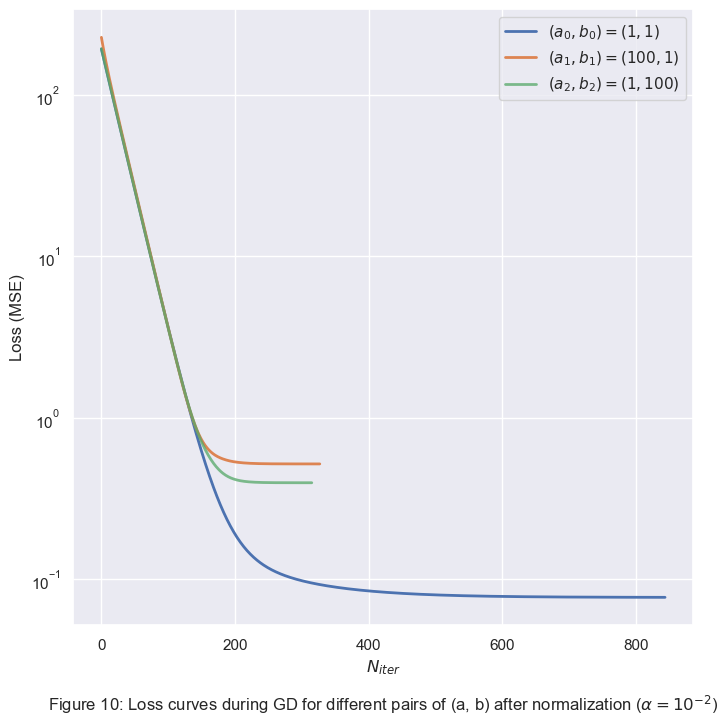

In [39]:
# Loss curves for different alpha for normalized data
plt.figure(figsize=(8,8))

#your code goes here
plt.plot(losses_12_norm, linewidth=2, label=f'$(a_{0}, b_{0}) = ({a0}, {b0})$')
plt.plot(losses_12_norm_1, linewidth=2, label=f'$(a_{1}, b_{1}) = ({a1}, {b1})$')
plt.plot(losses_12_norm_2, linewidth=2, alpha=0.75, label=f'$(a_{2}, b_{2}) = ({a2}, {b2})$')
plt.title(r'Figure 10: Loss curves during GD for different pairs of (a, b) after normalization ($\alpha = 10^{-2}$)', y=-0.15)
plt.xlabel('$N_{iter}$')
plt.ylabel('Loss (MSE)')
plt.yscale('log')
plt.legend();

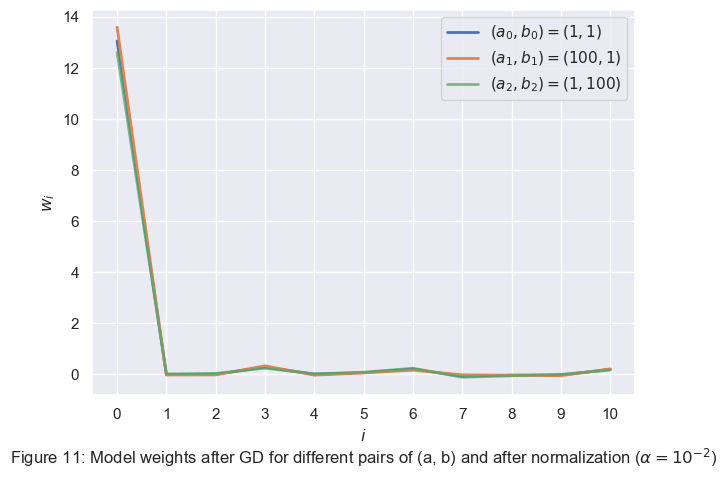

In [40]:
# Weights for different pairs of (a, b)
plt.figure(figsize=(7,5))
plt.plot(weights_12_norm[-1], linewidth=2, label=f'$(a_{0}, b_{0}) = ({a0}, {b0})$')
plt.plot(weights_12_norm_1[-1], linewidth=2, label=f'$(a_{1}, b_{1}) = ({a1}, {b1})$')
plt.plot(weights_12_norm_2[-1], linewidth=2, alpha=0.75, label=f'$(a_{2}, b_{2}) = ({a2}, {b2})$')
plt.xticks(range(11))
plt.title(r'Figure 11: Model weights after GD for different pairs of (a, b) and after normalization ($\alpha = 10^{-2}$)', y=-0.2)
plt.xlabel('$i$')
plt.ylabel('$w_{i}$')
plt.legend();

###### <a id="tab6">.</a>

In [41]:
# Since we have shown above that the loss is minimal for alpha = 1e-2 for normalized data, let's use the weights for this alpha and those obtained in the last iteration
print(f'Weights before gradient descent:\n{w_init}')
print(f'Weights for alpha = 1e-7 after gradient descent:\n{weights_17[-1]}')
print(f'Weights for alpha = 1e-2 after gradient descent with normalization:\n{weights_12_norm[-1]}')
print(f'Weights for alpha = 1e-2 after gradient descent with normalization and (a, b) = ({a1}, {b1}):\n{weights_12_norm_1[-1]}')
print(f'Weights for alpha = 1e-2 after gradient descent with normalization and (a, b) = ({a2}, {b2}):\n{weights_12_norm_2[-1]}')
print('--------+', '-----------+', '-------------+', '-----------+', '------------------+', '---------------------------+', '--------------------------')
print('House #\t|', 'Real price |', 'y_hat w/o GD |', 'y_hat w/GD |', 'y_hat w/GD + norm |', f'y_hat w/GD + norm +({a1},{b1}) |', f'y_hat w/GD + norm +({a2},{b2})')
print('--------+', '-----------+', '-------------+', '-----------+', '------------------+', '---------------------------+', '--------------------------')
for idx in idxs:
    y_pred_before_gd = y_hat(np.array(w_init), X_orig[idx])
    y_pred_after_gd = y_hat(np.array(weights_17[-1]), X_orig[idx])
    y_pred_after_gd_norm = y_hat(np.array(weights_12_norm[-1]), X_norm[idx])
    y_pred_after_gd_norm_1 = y_hat(np.array(weights_12_norm_1[-1]), X_norm[idx])
    y_pred_after_gd_norm_2 = y_hat(np.array(weights_12_norm_2[-1]), X_norm[idx])
    print(f'{idx:5}\t|{datY[idx]:9.4f}   |{y_pred_before_gd:11.4f}   |{y_pred_after_gd:9.4f}   |{y_pred_after_gd_norm:9.4f}\t     |{y_pred_after_gd_norm_1:9.4f}\t\t\t  |{y_pred_after_gd_norm_2:9.4f}')
print('--------+', '-----------+', '-------------+', '-----------+', '------------------+', '---------------------------+', '--------------------------')
print('Table 6: Predictions before and after gradient descent without and with normalization, symmetric and asymmetric loss function')

Weights before gradient descent:
[-1, 0.8, -0.4, -0.3, -0.2, -0.9, 0.7, -0.9, 0.3, -0.4, -0.4]
Weights for alpha = 1e-7 after gradient descent:
[-1.00033132  0.79936091 -0.39996721  0.09675956 -0.19995267 -0.90130004
  0.69875633 -0.10276049 -0.10047995 -0.35941668 -0.41576283]
Weights for alpha = 1e-2 after gradient descent with normalization:
[ 1.30489545e+01 -1.19855053e-02  7.48361125e-03  2.81373324e-01
  1.17047636e-02  6.73995433e-02  2.12967919e-01 -8.10558579e-02
 -2.83246127e-02 -2.33231222e-02  1.95556675e-01]
Weights for alpha = 1e-2 after gradient descent with normalization and (a, b) = (100, 1):
[13.58607717 -0.02197155 -0.02012696  0.33672294 -0.03078798  0.05708634
  0.16543708 -0.01720508 -0.03302556 -0.05075816  0.21547239]
Weights for alpha = 1e-2 after gradient descent with normalization and (a, b) = (1, 100):
[ 1.25975384e+01  1.92817112e-02  4.07307957e-02  2.41235652e-01
  1.95582789e-02  8.53357218e-02  2.41477691e-01 -1.11166278e-01
 -5.53769200e-02  4.94817200

In [42]:
# Let's also find the best b to minimize the mean loss for the given number of iterations
bb = [0.01, 0.1, 1, 10, 100]
# The most obvious approach
# mean_losses_norm_b = []
# for b in bb:
#     weights_norm_b, losses_norm_b = new_gradDescent(w_init=w_init, alpha=1e-2, X=X_norm, y=datY, a=1, b=b)
#     mean_losses_norm_b.append(np.mean(losses_norm_b))
# More sophisticated approach
from functools import partial as part_func
# Create a new function with the signature without the parameter 'b'
partial_new_gradDescent = part_func(new_gradDescent, w_init, 1e-2, X_norm, datY, 1)
# Apply this new function to the list 'bb'
mean_losses_norm_b = [np.mean(ll) for ww, ll in map(partial_new_gradDescent, bb)]

###### <a id="fig12">.</a>

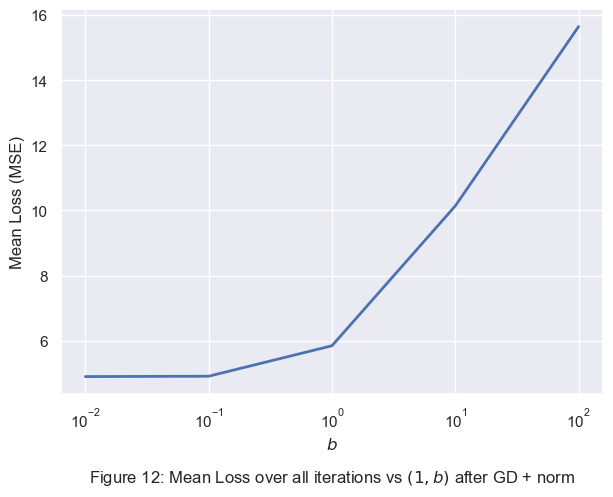

In [43]:
plt.figure(figsize=(7,5))
plt.plot(bb, mean_losses_norm_b, linewidth=2)
plt.title(f'Figure 12: Mean Loss over all iterations vs $(1, b)$ after GD + norm', y=-0.25)
plt.xlabel('$b$')
plt.ylabel('Mean Loss (MSE)')
plt.xscale('log');

###### <a id="tab7">.</a>

In [44]:
print('(1, b)', *bb, sep='\t\t\t')
print('Mean Loss', *mean_losses_norm_b, sep='\t')
print(f'Table 7: Mean Loss over all iterations vs pairs (1, b) after GD with normalization')

(1, b)			0.01			0.1			1			10			100
Mean Loss	4.902259304277438	4.9136836238917985	5.84925046779027	10.140350387316913	15.644931121423427
Table 7: Mean Loss over all iterations vs pairs (1, b) after GD with normalization


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of asymmetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

1. Weights are different for different $\alpha$, which is expected, since we have shown that the bigger the $\alpha$, the smaller the loss, and the weights convergence is faster -- see [Figure 1](#fig1) and [Figure 5](#fig5). Also, weights are sufficiently different for original and normalized data, which again is expected, since after normalization we have in fact different distributions of feature values and thus the weights may be significantly different to predict the same value of y -- see [Figure 8](#fig8).

    Regarding parameters of asymmetry $(a, b)$, we have shown that (see [Table 6](#tab6)):
    * if $a > b$ $(a/b > 1)$, then we overestimate the price, i.e. we win the bid for an apartment but we will overpay,
    * if $a < b$ $(a/b < 1)$, then we underestimate the price, i.e. we lose the bid for an apartment but also won't lose any money.

2. One of approaches to estimate $b$ is to compute the mean value of the loss function over all iterations of gradient descent for normalized data for different pairs of $(a, b) = (1, b)$ and choose $b$ that corresponds to the smallest mean value of the loss function -- see [Figure 12](#fig12) and [Table 7](#tab7). Our experiment shows that the smaller the $b$, the smaller the mean loss.